<a href="https://colab.research.google.com/github/poitrew11/Young-Yandex-homeworks/blob/main/Vk-stazh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [3]:
import pandas as pd

data = pd.read_csv('video_sessions_transformed.csv')
data.head()

,user_id,video_owner_id,total_view_time,vk_platform,nav_screen,video_id
0,5137060586,197846393764,0,vk_video_ios,video_for_you,1524753638856
1,6791352918,255312742952,0,vk_video_android,video_search,1524750811524
2,8499858010,290290140528,2,vk_video_android,video_for_you,1524751697154
3,13064371614,296968444192,0,vk_video_android,video_search,1524751112304
4,15865765790,283074246524,0,vk_video_android,video_for_you,1524752278662


Проверим данные на выбросы/пропущенные значения значения

np.int64(0)

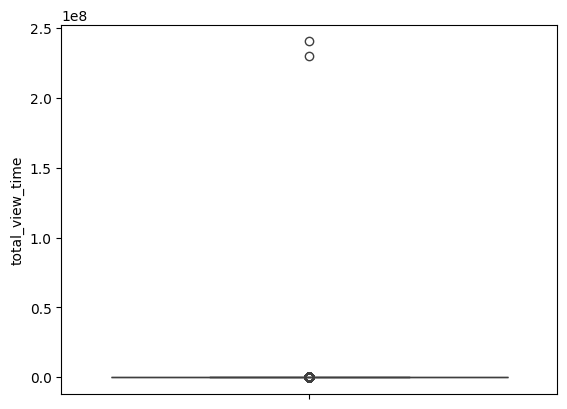

In [11]:
import seaborn as sns
plott = data['total_view_time']
sns.boxplot(data=plott)
plott.isna().sum()

In [15]:
data.isna().sum()

,0
user_id,0
video_owner_id,0
total_view_time,0
vk_platform,0
nav_screen,0
video_id,0


In [21]:
data.shape

(4503, 6)

In [22]:
plott.max()

240502233

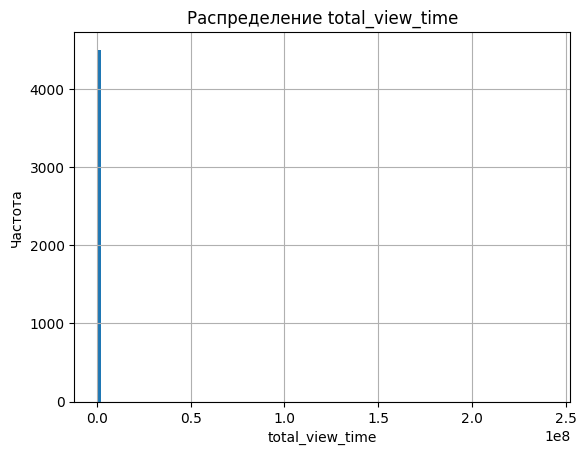

In [19]:
import matplotlib.pyplot as plt

data['total_view_time'].hist(bins = 100)
plt.title('Распределение total_view_time')
plt.xlabel('total_view_time')
plt.ylabel('Частота')
plt.show()

In [26]:
data.sort_values(by='total_view_time', ascending=False)


,user_id,video_owner_id,total_view_time,vk_platform,nav_screen,video_id
4502,323234425,2394994,240502233,other,video_group_all,232412412
4501,242424222,232300404,230100333,vk_video_android,feed,152473232
2364,6701627386804,105949036644,25945,vk_video_android,video_search,1524763033218
3725,20675651967824,283348041780,22164,vk_video_ios,video_for_you,1524758705328
2915,31695284326300,225987071076,16113,vk_video_ios,video_for_you,1524756676734
...,...,...,...,...,...,...
2731,21009439830750,293828666900,0,vk_video_ios,video_for_you,1524751165776
2732,21030563129926,292278366172,0,vk_video_ios,video_search,1524753866112
2720,20396751111002,292769954132,0,vk_video_ios,video_for_you,1524752445762
1014,112197623762,105497242828,0,vk_video_android,video_search,574475813730


In [27]:
data.sort_values(by='total_view_time')

,user_id,video_owner_id,total_view_time,vk_platform,nav_screen,video_id
4500,30204042042,-22323244242,-300,vk_video_ios,video_for_you,2344280
2579,15182900861100,218753722780,0,vk_video_android,video_for_you,1524751225932
2555,14438642290562,39442236716,0,vk_video_android,video_for_you,1524764042502
2556,14478840349344,279669882396,0,vk_video_ios,video_for_you,1524752101536
2557,14490322812700,279672446984,0,vk_video_android,video_for_you,1524754564590
...,...,...,...,...,...,...
2915,31695284326300,225987071076,16113,vk_video_ios,video_for_you,1524756676734
3725,20675651967824,283348041780,22164,vk_video_ios,video_for_you,1524758705328
2364,6701627386804,105949036644,25945,vk_video_android,video_search,1524763033218
4501,242424222,232300404,230100333,vk_video_android,feed,152473232


Выбросы находятся под индексами 4500 - 4502

In [28]:
data = data.drop(index=[4500, 4501, 4502])
data.max()

,0
user_id,37299994520642
video_owner_id,2649072653164
total_view_time,25945
vk_platform,vk_video_ios
nav_screen,video_search
video_id,1525611877824


In [30]:
invalid_count = (~data['vk_platform'].isin(['vk_video_ios', 'vk_video_android'])).sum()
print(f"Количество выбросов: {invalid_count}")


Количество выбросов: 0


In [31]:
filtered = data[data['total_view_time'] >= 30]
platform_counts = filtered['vk_platform'].value_counts()
print(platform_counts)


vk_platform
vk_video_android    274
vk_video_ios        123
Name: count, dtype: int64


vk_video_android имеет больше просмотров))

In [32]:
top_10 = data.groupby('video_owner_id')['total_view_time'].sum().sort_values(ascending=False).head(10)
print(top_10)


video_owner_id
279672446984    104638
105949036644     38595
279942606536     34615
145819277544     31157
292769954132     24399
140097381168     23929
283348041780     22196
292278366172     20639
225987071076     16113
283074246524     13193
Name: total_view_time, dtype: int64
